###### Importing packages, reading data set into memory, tidying data

In [1]:
#Importing the needed packages
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt

In [2]:
#Reading in data
filefolder = r"C:\Users\eugen\Desktop\Assigment\data".replace("\\","/")
Q1=''.join([filefolder,"/2019 Winter Data Science Intern Challenge Data Set.xlsx"])
df=pd.read_excel(Q1)
#Making copy
AOV=df.copy()

In [3]:
#Tidy data

#converted datatime64(ns) into string
AOV['created_at'] = AOV['created_at'].astype('str')
#Split data into date and time
AOV[['date','time']]=AOV['created_at'].str.split(pat=' ',expand=True)
#Split date into year, month, day
AOV[['year','month','day']]=AOV['date'].str.split(pat='-',expand=True)
#Split time into hour, min, second
AOV[['hour','minute','second']]=AOV['time'].str.split(pat=':',expand=True)
#Dropped unnecessary collumns
AOV = AOV.drop(['created_at','date','time','order_id','second','year'], axis=1)

#Display 
#AOV.head()
#Exploatory data analysis was removed for easier reading

# <div align="center">Shopify Technical Challenge Submission </div>
## <div align="center"> Data Science Intern </div>
### <div align="center"> Winter 2022 </div>
## <div align="center">Eugene Trostin</div>

#### Question 1. [Data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 



#### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [4]:
#Explaining the error with first calculation
avg_revenue= (AOV["order_amount"].mean())
print(f"{round(avg_revenue, 2)} is the average revenue for all stores, not the average order value (AOV)")

3145.13 is the average revenue for all stores, not the average order value (AOV)


* Following these sources [1](https://www.optimizely.com/optimization-glossary/average-order-value/), [2](https://www.shopify.com/blog/average-order-value) AOV is calculated by taking the revenue and dividing it by the number of orders
    * A better way to evaluate this data is to calculate average order value per purchase

In [5]:
#Calculate AOV for every purchase
AOV['average_order_value_per_purchase'] = (AOV.order_amount / AOV.total_items)
AOV.head()

,shop_id,user_id,order_amount,total_items,payment_method,month,day,hour,minute,average_order_value_per_purchase
0,53,746,224,2,cash,03,13,12,36,112.0
1,92,925,90,1,cash,03,03,17,38,90.0
2,44,861,144,1,cash,03,14,04,23,144.0
3,18,935,156,1,credit_card,03,26,12,43,156.0
4,18,883,156,1,credit_card,03,01,04,35,156.0


#### b.	What metric would you report for this dataset?

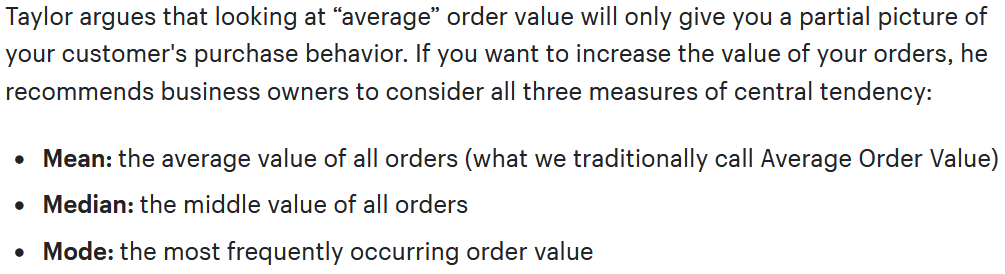

In [6]:
#Pulls image link
url = 'https://i.imgur.com/K7cy6BE.png'
#Displays image
IPython.display.Image(url, width = 600)
#Shopify explanation on use AOV and central tendency

In [7]:
mode_AOV = AOV['average_order_value_per_purchase'].mode().iloc[0]
mean_AOV = round(AOV['average_order_value_per_purchase'].mean(), 2)
median_AOV = AOV['average_order_value_per_purchase'].median()
print(f"For all sneaker shop's the mean is {round(mode_AOV)}, the Median is {round(mean_AOV, 2)}, and lastly the mode is {round(median_AOV)}")

For all sneaker shop's the mean is 153, the Median is 387.74, and lastly the mode is 153


<AxesSubplot:>

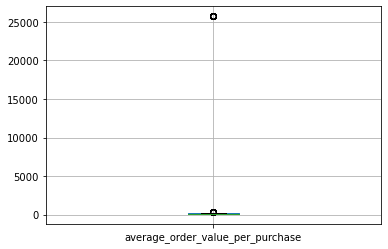

In [8]:
# Boxplot to view central deviation and whiskers
AOV.boxplot(column='average_order_value_per_purchase')

* Big case for outliers for store 78, a pair of sneakers are being sold for $25725
* It's possible that this might be Michael Jordan's side hustle 
    * This does not meet the norm, overstating the average for other stores

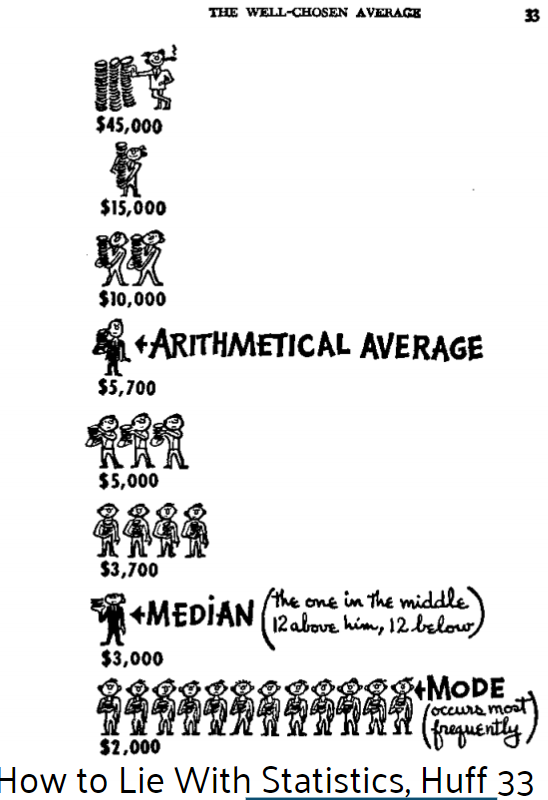

In [9]:
#Pulls image link
url = 'https://i.imgur.com/52wIcUn.png'
#Displays image
IPython.display.Image(url, width = 300)
#Issues with averages

* There are several flaws to view the average without taking account of other central tendency calculations
* While purchasing sneakers for $25725 is possible, it's best to drop observations for store 78 as this is a unique set of 48 transaction.
    * It best to invesigate this separately 
* This leaves us with 99 stores and 99.1% of observations

#### c.	What is its value?

* Re-calculate the same metrics but dropping outlier (store 78)

In [10]:
# Boolean to calculate average exclusing store 78
AOV_without_78=AOV[AOV['shop_id']!=78].copy()

In [11]:
mean_AOV = round(AOV_without_78['average_order_value_per_purchase'].mean(), 2)
median_AOV = AOV_without_78['average_order_value_per_purchase'].median()
mode_AOV = AOV_without_78['average_order_value_per_purchase'].mode().iloc[0]
print(f"For all sneaker shop's the mean is {round(mode_AOV)}, the Median is {round(mean_AOV, 2)}, and lastly the mode is {round(median_AOV)}")

For all sneaker shop's the mean is 153, the Median is 152.48, and lastly the mode is 153


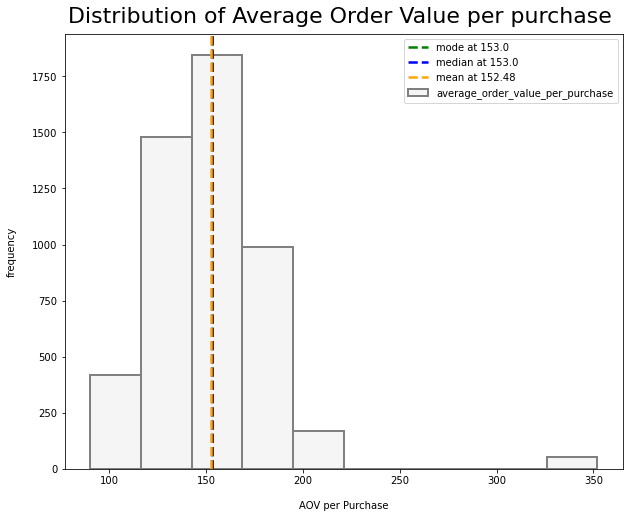

In [12]:
AOV_without_78['average_order_value_per_purchase'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("AOV per Purchase", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Average Order Value per purchase ", y=1.012, fontsize=22)
measurements = [mode_AOV, median_AOV, mean_AOV]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

* The value associated with mean, median, mode represent 99 stores and 99.1% of observations
* All three calculations converge around 153$

#### Question 2
For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

##### a.	How many orders were shipped by Speedy Express in total?
```SQL
SELECT COUNT(*) AS "Speedy_Express_Order_Count" 
FROM Orders
WHERE Orders.ShipperID = 
(
  SELECT ShipperID 
  FROM Shippers 
  WHERE ShipperName = "Speedy Express"
  );
```
#####  Speedy Express has shipped 54 orders

##### b.	What is the last name of the employee with the most orders?
```sql
SELECT e.LastName
FROM Employees e
INNER JOIN Orders o
	ON e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID, e.LastName
HAVING COUNT(*) = (SELECT MAX(numberOrders)
					FROM (SELECT EmployeeID, COUNT(OrderID) AS numberOrders
							FROM Orders
							GROUP BY EmployeeID) maxOrders)
```                            
#####  Peacock is an employee who has fulfilled the most orders

##### c.	What product was ordered the most by customers in Germany?
```sql
SELECT p.ProductName
FROM Products p
INNER JOIN (
            SELECT ProductID, MAX(Quantity)
            FROM (
                  SELECT ProductID, SUM(Quantity) as Quantity
                  FROM Orders o
                  INNER JOIN (
                    SELECT CustomerID
                    FROM Customers
                    WHERE Country = 'Germany') germanCustomer 
                  ON o.CustomerID = germanCustomer.CustomerID
                  INNER JOIN OrderDetails od
                  ON od.OrderID = o.OrderID
                  GROUP BY ProductID )
                  ) mP
ON mP.ProductID = p.ProductID
```
#####  Boston Crab Meat